In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
años = [2019, 2020, 2021]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']

conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

tweets = pd.DataFrame()

for año in años:
	for quarter in quarters:
		for concepto in conceptos:
			try:
				newtweets = pd.read_csv('datasets/' + str(año) + '/' + concepto + '_' + str(año) + '_' + quarter + '.csv', index_col=1)
				newtweets['archivo'] = concepto + '_' + str(año) + '_' + quarter + '.csv'
				newtweets['keyword'] = concepto
				tweets = pd.concat([tweets, newtweets])
			except:
				print('No se encuentra '+ 'datasets/' + str(año) + '/' + concepto + '_' + str(año) + '_' + quarter + '.csv')

tweets.shape

No se encuentra datasets/2019/Convencion_Constitucional_2019_Q1.csv
No se encuentra datasets/2019/Proceso_Constituyente_2019_Q1.csv
No se encuentra datasets/2019/Nueva_Constitucion_2019_Q1.csv
No se encuentra datasets/2019/Convencion_Constituyente_2019_Q1.csv
No se encuentra datasets/2019/Convencion_Constitucional_2019_Q2.csv
No se encuentra datasets/2019/Proceso_Constituyente_2019_Q2.csv
No se encuentra datasets/2019/Nueva_Constitucion_2019_Q2.csv
No se encuentra datasets/2019/Convencion_Constituyente_2019_Q2.csv
No se encuentra datasets/2019/Convencion_Constitucional_2019_Q3.csv
No se encuentra datasets/2019/Proceso_Constituyente_2019_Q3.csv
No se encuentra datasets/2019/Nueva_Constitucion_2019_Q3.csv
No se encuentra datasets/2019/Convencion_Constituyente_2019_Q3.csv
No se encuentra datasets/2021/Convencion_Constitucional_2021_Q2.csv
No se encuentra datasets/2021/Proceso_Constituyente_2021_Q2.csv
No se encuentra datasets/2021/Nueva_Constitucion_2021_Q2.csv
No se encuentra datasets/20

(824162, 20)

In [39]:
tweets = tweets.drop_duplicates(ignore_index=False)
tweets.shape

(824151, 22)

In [34]:
# parse dates
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['date_day'] = tweets['date'].dt.date
tweets['date_month'] = tweets['date'].dt.strftime('%Y-%m')
tweets = tweets.sort_values(by='date', ascending=True)

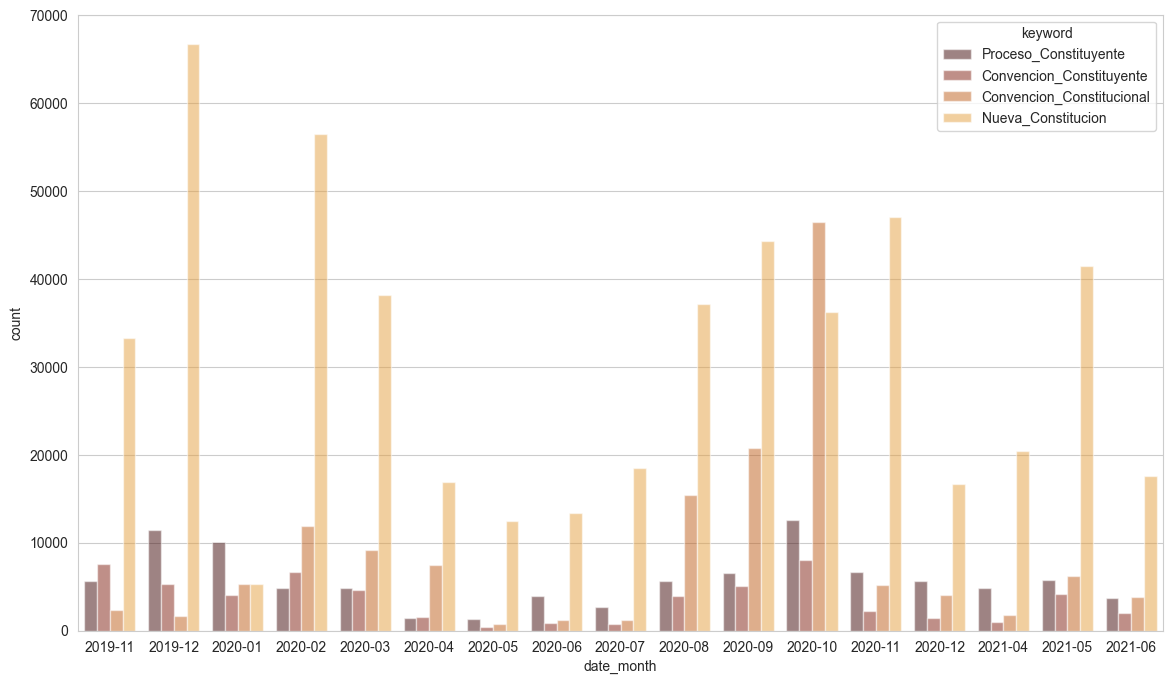

In [38]:
sns.set_style('whitegrid')
sns.set_palette('afmhot')

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='date_month', data=tweets, ax=ax, alpha=0.5, hue='keyword')
plt.show()

In [36]:
hashtags = tweets[tweets['hashtags'].isna() == False]['hashtags']

total_hashtags = []

for i in hashtags:
	i = i.replace('[', '').replace(']', '').replace("'", '').split(', ')
	for j in i:
		total_hashtags.append(j)

total_hashtags = pd.Series(total_hashtags)
total_hashtags.to_csv('datasets/hashtags.csv', index=False)
total_hashtags.head()

0           PlebiscitoDeEntrada
1         AsambleaConstituyente
2             QueElPuebloDecida
3          ProcesoConstituyente
4    NuevaConstitucionParaChile
dtype: object

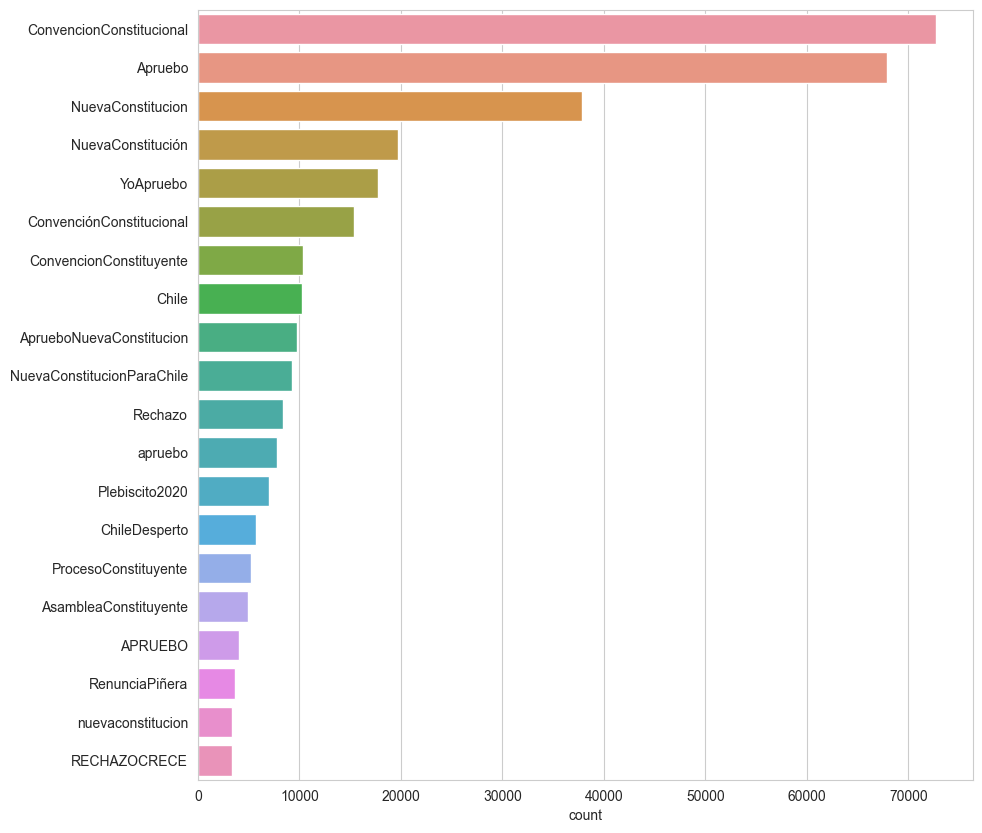

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=total_hashtags, order=total_hashtags.value_counts()[:20].index, ax=ax)
plt.show()